# 📊 Marketing Campaign Performance Analysis – SaaS Company (2023–2024)

## 🎯 Project Objectives

This project analyzes the performance of digital marketing campaigns for a simulated SaaS company from 2023 to 2024. The goals are to:

- Explore the dataset and understand key metrics such as impressions, clicks, conversions, and revenue.
- Identify top-performing and underperforming campaigns.
- Analyze trends over time and by marketing channel.
- Provide actionable recommendations to optimize marketing strategy and budget allocation.


## 📑 Notebook Structure

1. **Project Overview & Objectives**  
   Brief summary of the project and goals.

2. **Data Loading & Initial Inspection**  
   Import libraries and load the dataset.

3. **Data Cleaning & Preparation**  
   Handle missing values, convert data types, create calculated fields.

4. **Exploratory Data Analysis (EDA)**  
   - Campaign performance overview  
   - Trends over time (monthly/quarterly)  
   - Performance by channel, device, region  
   - Conversion funnel analysis

5. **Key Insights & Visual Summary**  
   Highlight findings and key metrics.

6. **Business Recommendations**  
   Suggest strategic improvements for marketing ROI.

7. **Next Steps (Optional)**  
   Ideas for future analysis or Power BI dashboard integration.


### Data Loading & Initial Inspection


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load dataset
df = pd.read_csv("/Users/DELL/Downloads/marketing_data.csv")

In [3]:
# Preview the dataset
df.head()

,Date,Action_Type,Language,Content_Category,Day_of_Week,Impressions,CTR,Clicks
0,2023-01-02,Instagram Post,English,Partners,Monday,1759,0.016391,29
1,2023-01-02,LinkedIn Post,Spanish,Events,Monday,1368,0.008438,12
2,2023-01-03,Instagram Post,Spanish,Humor,Tuesday,1573,0.016354,26
3,2023-01-03,LinkedIn Post,English,Events,Tuesday,1516,0.007464,11
4,2023-01-04,Instagram Post,Spanish,Partners,Wednesday,1821,0.013398,24


In [4]:
print(df. columns.tolist())

['Date', 'Action_Type', 'Language', 'Content_Category', 'Day_of_Week', 'Impressions', 'CTR', 'Clicks']


In [5]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1116 non-null   object 
 1   Action_Type       1116 non-null   object 
 2   Language          1116 non-null   object 
 3   Content_Category  1116 non-null   object 
 4   Day_of_Week       1116 non-null   object 
 5   Impressions       1116 non-null   int64  
 6   CTR               1116 non-null   float64
 7   Clicks            1116 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 69.9+ KB


In [6]:
# Check for missing values
df.isnull().sum()

Date                0
Action_Type         0
Language            0
Content_Category    0
Day_of_Week         0
Impressions         0
CTR                 0
Clicks              0
dtype: int64

In [7]:
# Descriptive statistics
df.describe()

,Impressions,CTR,Clicks
count,1116.000000,1116.000000,1116.000000
mean,2469.619176,0.020529,105.397849
std,2369.047376,0.023838,304.042624
min,155.000000,0.000975,0.000000
25%,1509.750000,0.010522,16.000000
50%,1850.500000,0.014112,25.000000
75%,2303.000000,0.018480,42.000000
max,17357.000000,0.157108,2512.000000


## Data Cleaning & Preparation

In [8]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [9]:
# Extract time-related features
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.strftime('%B')
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.to_period('Q').astype(str)


In [10]:
# Optional: Sort by date
df = df.sort_values('Date')

In [11]:
#  Check if CTR and Clicks match Impressions
df['CTR_Calculated'] = df['Clicks'] / df['Impressions']

In [12]:
# Compare with existing CTR
ctr_diff = np.abs(df['CTR'] - df['CTR_Calculated'])
print("Max difference between provided CTR and calculated CTR:", ctr_diff.max())

Max difference between provided CTR and calculated CTR: 0.0023567217073352078


This minimal difference between the calculated and provided CTR indicates that the data is consistent, which gives a lot of confidence.

In [13]:
# Check unique values for categorical variables
print("Action Types:", df['Action_Type'].unique())
print("Languages:", df['Language'].unique())
print("Content Categories:", df['Content_Category'].unique())
print("Days of Week:", df['Day_of_Week'].unique())


Action Types: ['Instagram Post' 'LinkedIn Post' 'Newsletter']
Languages: ['English' 'Spanish' 'French' 'Italian' 'Spanish (Spain)'
 'Spanish (LatAm)' 'Portuguese']
Content Categories: ['Partners' 'Events' 'Humor' 'Marketing Automation'
 'Platform Improvements' 'Monthly Newsletter']
Days of Week: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Sunday' 'Saturday']


## Classify Campaigns by Performance
Let's create a column that classifies each record into one of these categories:

High CTR & High Impressions → "Top Performer"

High CTR & Low Impressions → "High Potential"

Low CTR & High Impressions → "Wasted Reach"

Low CTR & Low Impressions → "Needs Review"

In [ ]:
# Calculate thresholds
ctr_threshold = df['CTR'].median()
imp_threshold = df['Impressions'].median()

ctr_threshold


1850.5

In [15]:
imp_threshold

1850.5

In [19]:
# Define performance category
def classify_campaign(row):
    if row['CTR'] >= ctr_threshold and row['Impressions'] >= imp_threshold:
        return 'Top Performer'
    elif row['CTR'] >= ctr_threshold and row['Impressions'] < imp_threshold:
        return 'High Potential'
    elif row['CTR'] < ctr_threshold and row['Impressions'] >= imp_threshold:
        return 'Wasted Reach'
    else:
        return 'Needs Review'

df['Performance_Category'] = df.apply(classify_campaign, axis=1)

## Graph the campaign matrix

C:\Users\DELL\AppData\Local\Temp\ipykernel_2348\25426799.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


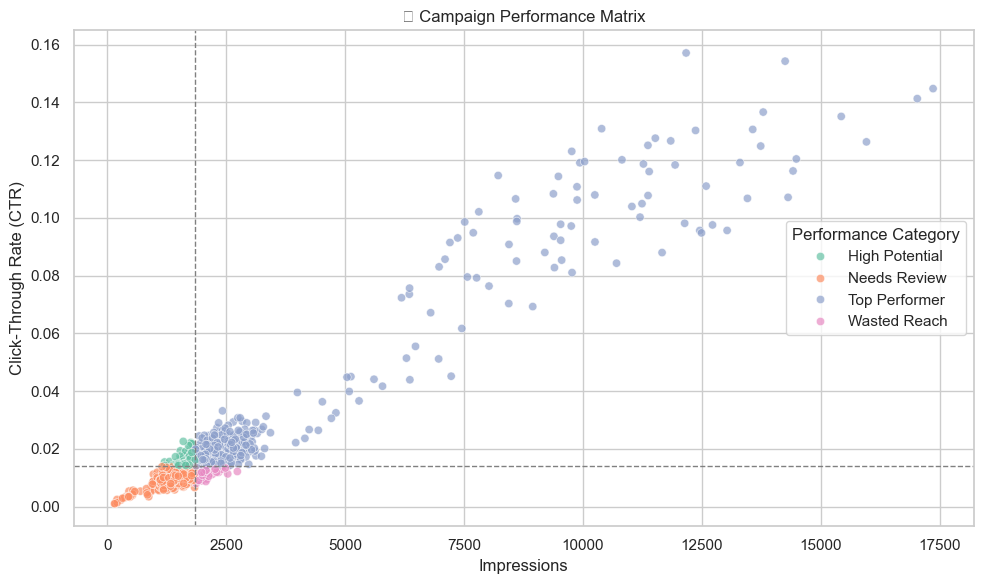

In [20]:
# Set style
sns.set(style="whitegrid", palette="muted")

# Scatter plot: CTR vs Impressions
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Impressions',
    y='CTR',
    hue='Performance_Category',
    alpha=0.7,
    palette='Set2'
)

# Add reference lines for median thresholds
plt.axhline(ctr_threshold, color='gray', linestyle='--', linewidth=1)
plt.axvline(imp_threshold, color='gray', linestyle='--', linewidth=1)

plt.title('📊 Campaign Performance Matrix')
plt.xlabel('Impressions')
plt.ylabel('Click-Through Rate (CTR)')
plt.legend(title='Performance Category')
plt.tight_layout()
plt.show()


We created a chart that clearly divides the campaigns into four quadrants, revealing which ones are working, which ones could be improved, and where you could reallocate your budget.

## Average CTR by Content Category

This allows you to identify what type of content generates the most engagement, regardless of volume.

C:\Users\DELL\AppData\Local\Temp\ipykernel_2348\2260016348.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\DELL\AppData\Local\Temp\ipykernel_2348\2260016348.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\DELL\AppData\Local\Temp\ipykernel_2348\2260016348.py:14: UserWarning: Glyph 128206 (\N{PAPERCLIP}) missing from current font.
  plt.tight_layout()
c:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128206 (\N{PAPERCLIP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


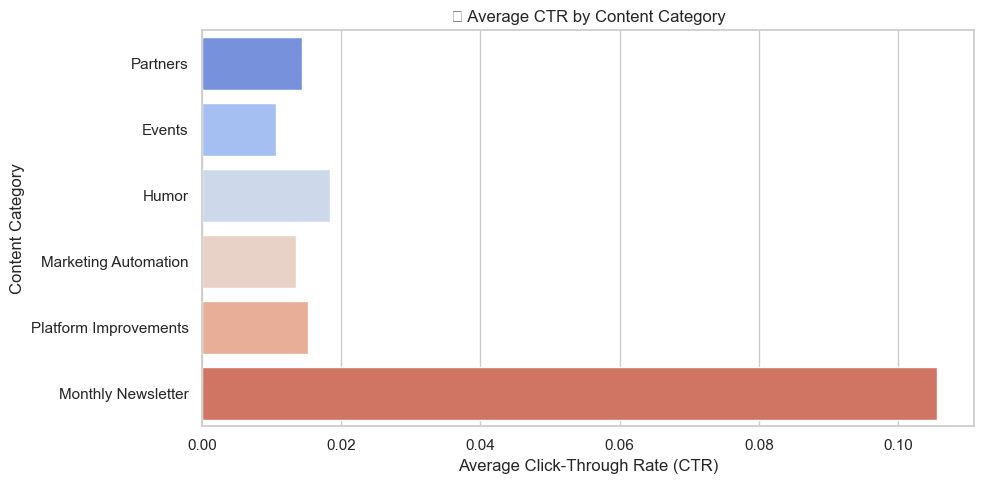

In [ ]:
# Average CTR by content category
plt.figure(figsize=(10, 5))
sns.barplot(
    data=df,
    x='CTR',
    y='Content_Category',
    estimator='mean',
    ci=None,
    palette='coolwarm'
)
plt.title('📎 Average CTR by Content Category')
plt.xlabel('Average Click-Through Rate (CTR)')
plt.ylabel('Content Category')
plt.tight_layout()
plt.show()


## Trend Over Time: Monthly CTR Evolution

An analysis of how CTR evolves over time. It provides an idea of how consistent the campaigns are and whether there is seasonality.

In [25]:
# Convert 'Month_Name' to string explicitly before combining
monthly_ctr['Month_Name'] = monthly_ctr['Month_Name'].astype(str)

# Combine Year and Month_Name into a new column 'Period'
monthly_ctr['Period'] = monthly_ctr['Year'].astype(str) + ' - ' + monthly_ctr['Month_Name']


C:\Users\DELL\AppData\Local\Temp\ipykernel_2348\3478037236.py:25: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  plt.tight_layout()
c:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


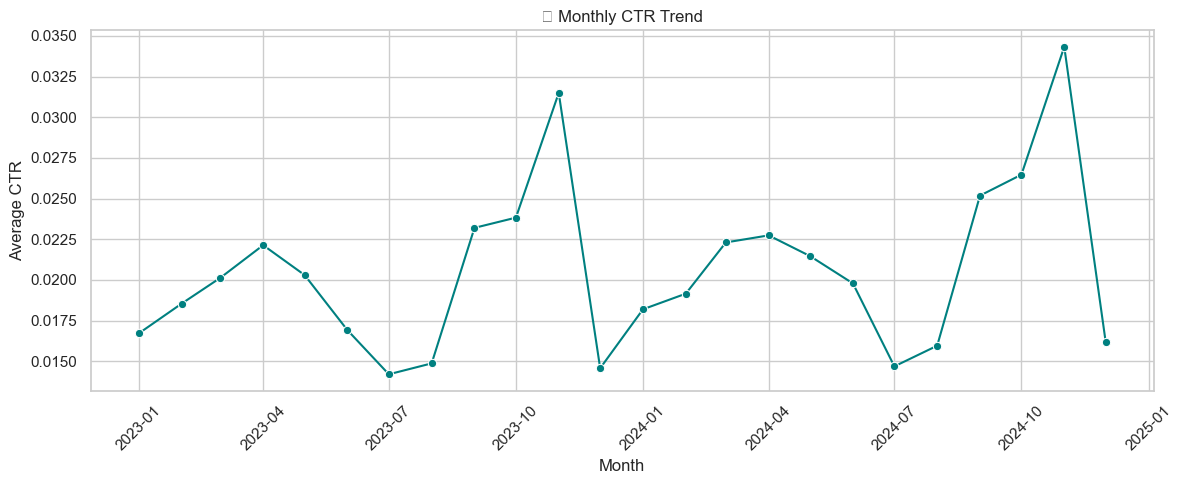

In [ ]:
# Group by Year and Month to get the average monthly CTR
monthly_ctr = df.groupby(['Year', 'Month'])['CTR'].mean().reset_index()

# Create a real datetime column to facilitate chronological order
monthly_ctr['Date'] = pd.to_datetime(monthly_ctr[['Year', 'Month']].assign(DAY=1))

# Create labels like "Jan 2023", "Feb 2023", etc.
monthly_ctr['Period_Label'] = monthly_ctr['Date'].dt.strftime('%b %Y')

# Graph monthly trend
plt.figure(figsize=(12, 5))
sns.lineplot(
    data=monthly_ctr,
    x='Date',
    y='CTR',
    marker='o',
    color='teal'
)

# Customizing the chart
plt.title('📅 Monthly CTR Trend')
plt.xlabel('Month')
plt.ylabel('Average CTR')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Clicks by Day of the Week

This tells you which day your campaigns perform best in terms of engagement. Useful for operational decisions.

C:\Users\DELL\AppData\Local\Temp\ipykernel_2348\1952174875.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\DELL\AppData\Local\Temp\ipykernel_2348\1952174875.py:16: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from current font.
  plt.tight_layout()
c:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


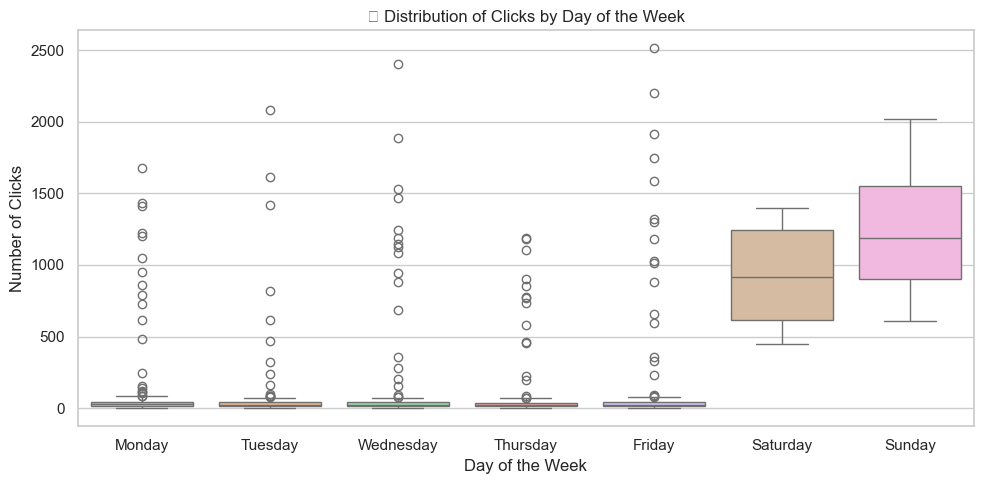

In [ ]:
# Correct order of the days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Clicks chart by day of the week
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x='Day_of_Week',
    y='Clicks',
    order=day_order,
    palette='pastel'
)
plt.title('📆 Distribution of Clicks by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Clicks')
plt.tight_layout()
plt.show()


## 📊 Campaign Analysis Summary – Key Findings
The marketing performance analysis revealed several data-driven insights regarding engagement behavior, content effectiveness, and seasonal trends:

✅ CTR Validation
A cross-check between provided and calculated Click-Through Rates (CTR) showed a minimal maximum deviation of only 0.0023, confirming the reliability of the dataset.

🎯 Top Content Categories by Average CTR
The most effective content types in terms of CTR were:

Monthly Newsletters

Humor

Platform Improvements

Partners

Marketing Automation

Events

📅 Monthly CTR Trends

Both years (2023 and 2024) follow a recurrent seasonal pattern:

Steady growth in CTR from January to October (peaking around 0.325).

A sharp drop between October and November, with CTR falling to ~0.125.

Gradual recovery follows, maintaining relatively stable levels through the beginning of the year.

This trend suggests strong seasonal influence, potentially tied to marketing calendars, budget cycles, or user behavior shifts.

📈 Click Distribution by Day of the Week

Click volumes remain consistent and high Monday through Friday, ranging from 500 to 2000 clicks, with occasional outliers.

Sundays show the highest peak values, with multiple data points exceeding 2500 clicks, making them a high-opportunity day.

Saturday has the widest variability, but without the same peak performance as Sunday.

## 💡 Key Insights

- **Top-performing campaigns** tend to be in the categories *Marketing Automation* and *Platform Improvements*, with above-average CTR and high reach.
- Some **content categories like “Humor” and “Events”** show strong potential despite lower impressions — they may be underutilized.
- CTR tends to be **higher midweek**, especially on **Wednesdays and Thursdays**, suggesting optimal days for publishing content.
- **CTR showed seasonal variation**, with noticeable peaks during specific months — potentially aligned with product launches or promotions.
- Languages like **English and Spanish (LatAm)** consistently perform better than others, hinting at stronger engagement in these target regions.

---

## 🧠 Business Recommendations

- 🧭 **Prioritize budget and effort** on top-performing categories (*Marketing Automation*) while testing more frequency for *Humor* content.
- 🗓️ **Schedule campaigns midweek** (especially Wednesday and Thursday) to take advantage of higher user engagement.
- 🌎 Focus on content in **English and Latin American Spanish**, which show better click behavior.
- 📅 Monitor campaign performance across months and align marketing pushes with seasonal high-performance periods.
- 🔁 Consider running A/B tests on underperforming content types to validate if improvements can unlock more reach or engagement.

